<a href="https://colab.research.google.com/github/Darwin575/CSE422_Courseworks/blob/main/lariosa_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Dataset from Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prathamtripathi/drug-classification")

print("Path to dataset files:", path)

100%|██████████| 1.68k/1.68k [00:00<00:00, 1.09MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/prathamtripathi/drug-classification/versions/1


## Import Required Libraries

In [ ]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data handling
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling
from sklearn.neural_network import MLPClassifier  # For Multilayer Perceptron (MLP) classification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation
import matplotlib.pyplot as plt  # For plotting confusion matrix
import seaborn as sns  # For visualization

## Load Dataset



In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/prathamtripathi/drug-classification/versions/1/drug200.csv')

## Encode Categorical Variables

In [ ]:
# Encoding categorical columns: 'Sex', 'BP', 'Cholesterol', 'Drug'
label_encoder = LabelEncoder()

# Encoding 'Sex' (F = 0, M = 1)
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Encoding 'BP' (HIGH = 1, NORMAL = 0)
df['BP'] = label_encoder.fit_transform(df['BP'])

# Encoding 'Cholesterol' (HIGH = 1, NORMAL = 0)
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

# Encoding 'Drug' (DrugY = 1, DrugX = 0, etc.)
df['Drug'] = label_encoder.fit_transform(df['Drug'])

# Show the dataframe to check the changes
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


## Define Features and Target

In [ ]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]  # Features
y = df['Drug']

## Split Data into Training and Testing Sets

In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Scale the Features

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (X_train and X_test)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show the scaled features (optional)
X_train_scaled[:5]


array([[-0.83405574, -1.03823026,  0.0820827 ,  1.1055416 , -0.74045911],
       [ 0.41196591,  0.96317747,  1.27601281, -0.90453403, -0.87126694],
       [-0.39794817, -1.03823026,  1.27601281,  1.1055416 , -0.89684776],
       [-0.77175466, -1.03823026,  0.0820827 , -0.90453403,  2.39090899],
       [-0.70945358,  0.96317747,  1.27601281, -0.90453403,  0.86573941]])

## Initialize and Train the MLP Classifier

In [ ]:
# Initialize the MLPClassifier with adaptive learning rate and 2 hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(50, 30),  # First layer: 50 neurons, Second layer: 30 neurons
                    activation='relu',           # ReLU activation function
                    solver='adam',               # Adam optimizer
                    learning_rate='adaptive',    # Adaptive learning rate
                    max_iter=2000,               # Maximum iterations
                    random_state=42,             # For reproducibility
                    batch_size=32)               # Batch size

# Train the model with the scaled data
mlp.fit(X_train_scaled, y_train)


MLPClassifier(batch_size=32, hidden_layer_sizes=(50, 30),
              learning_rate='adaptive', max_iter=2000, random_state=42)

## Make Predictions and Evaluate the Model

In [ ]:
# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Visualize the Confusion Matrix

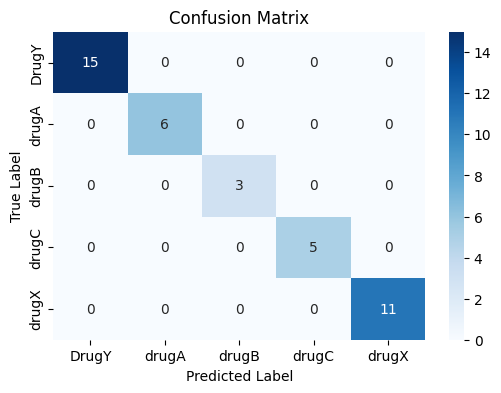

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
